In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [46]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [47]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pattern-Mining/mushrooms.csv')
df['class'].replace(['e','p'],['Edible','Poisonous'],inplace=True)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,Edible,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,Edible,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,Poisonous,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,Edible,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [48]:
print(df.shape)
print(df.info())


(8124, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-a

In [49]:
import time
start_time = time.process_time()
df_ap = pd.get_dummies(df,prefix_sep="_")
df1 =  apriori(df_ap, min_support=0.8, use_colnames = True, verbose=1)
print ((time.process_time() - start_time),"seconds")
df1.style.background_gradient("Greens")

Processing 5 combinations | Sampling itemset size 5
0.05222386599999851 seconds


,support,itemsets
0,0.974151,frozenset({'gill-attachment_f'})
1,0.838503,frozenset({'gill-spacing_c'})
2,1.000000,frozenset({'veil-type_p'})
3,0.975382,frozenset({'veil-color_w'})
4,0.921713,frozenset({'ring-number_o'})
5,0.812654,"frozenset({'gill-attachment_f', 'gill-spacing_c'})"
6,0.974151,"frozenset({'gill-attachment_f', 'veil-type_p'})"
7,0.973166,"frozenset({'gill-attachment_f', 'veil-color_w'})"
8,0.898080,"frozenset({'gill-attachment_f', 'ring-number_o'})"
9,0.838503,"frozenset({'veil-type_p', 'gill-spacing_c'})"


In [50]:
from mlxtend.frequent_patterns import fpgrowth
import time
start_time = time.process_time()
fp_growth = fpgrowth(df_ap, min_support=0.8,  use_colnames=True)
print ((time.process_time() - start_time),"seconds")
fp_growth.style.background_gradient("Greens")

0.10420041900000143 seconds


,support,itemsets
0,1.000000,frozenset({'veil-type_p'})
1,0.975382,frozenset({'veil-color_w'})
2,0.974151,frozenset({'gill-attachment_f'})
3,0.921713,frozenset({'ring-number_o'})
4,0.838503,frozenset({'gill-spacing_c'})
5,0.975382,"frozenset({'veil-color_w', 'veil-type_p'})"
6,0.974151,"frozenset({'gill-attachment_f', 'veil-type_p'})"
7,0.973166,"frozenset({'gill-attachment_f', 'veil-color_w'})"
8,0.973166,"frozenset({'gill-attachment_f', 'veil-color_w', 'veil-type_p'})"
9,0.921713,"frozenset({'ring-number_o', 'veil-type_p'})"


In [51]:
threshold = {
     'Threshold(0.6)' : 0.6,
     'Threshold(0.65)' : 0.65,
     'Threshold(0.7)' : 0.7,
     'Threshold(0.75)' : 0.75,
     'Threshold(0.8)' : 0.8, 
}
columns = []
compare = pd.DataFrame(columns = columns)
row_index = 0
for name,value in threshold.items():
  threshold_name = name
  fp_start_time = time.process_time()
  fp_growth = fpgrowth(df_ap, min_support= value,  use_colnames=True)
  fp_end_time = time.process_time() 
  fp_time =fp_end_time - fp_start_time

  ap_start_time = time.process_time()
  appriori =  apriori(df_ap, min_support= value, use_colnames = True, verbose=1)
  ap_end_time = time.process_time()
  ap_time = ap_end_time  - ap_start_time
  compare.loc[row_index,'threshold'] = threshold_name
  compare.loc[row_index, 'fp-growth'] = fp_time
  compare.loc[row_index, 'appriori'] = ap_time
  row_index+=1
compare

Processing 15 combinations | Sampling itemset size 5
Processing 10 combinations | Sampling itemset size 5
Processing 5 combinations | Sampling itemset size 5
Processing 5 combinations | Sampling itemset size 5
Processing 5 combinations | Sampling itemset size 5


,threshold,fp-growth,appriori
0,Threshold(0.6),0.118855,0.018713
1,Threshold(0.65),0.112129,0.016962
2,Threshold(0.7),0.101376,0.015999
3,Threshold(0.75),0.100767,0.015892
4,Threshold(0.8),0.099503,0.016960


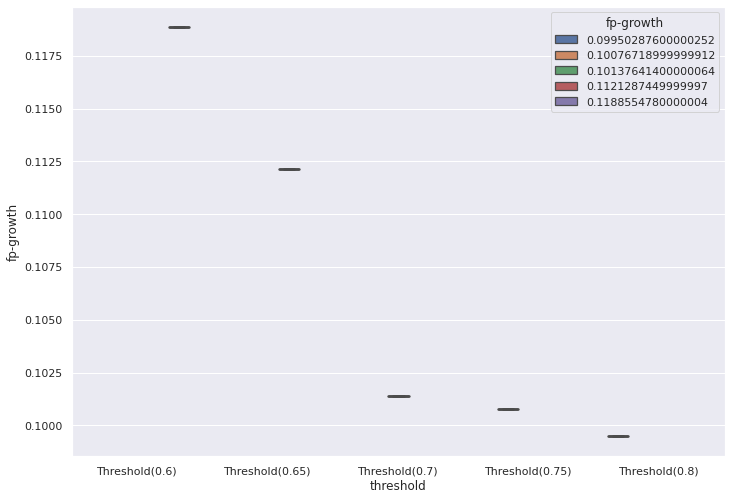

In [52]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="threshold", y="fp-growth", hue="fp-growth",
                 data=compare, linewidth=2.5)
figure = ax.get_figure()
figure.savefig("/content/drive/MyDrive/Colab Notebooks/Pattern-Mining/fp_mashroom.png")

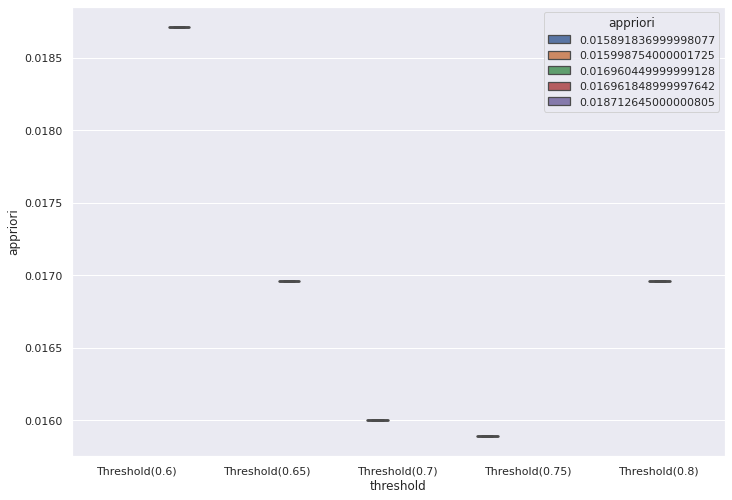

In [53]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="threshold", y="appriori", hue="appriori",
                 data=compare, linewidth=2.5)
figure = ax.get_figure()
figure.savefig("/content/drive/MyDrive/Colab Notebooks/Pattern-Mining/ap_mashroom.png")

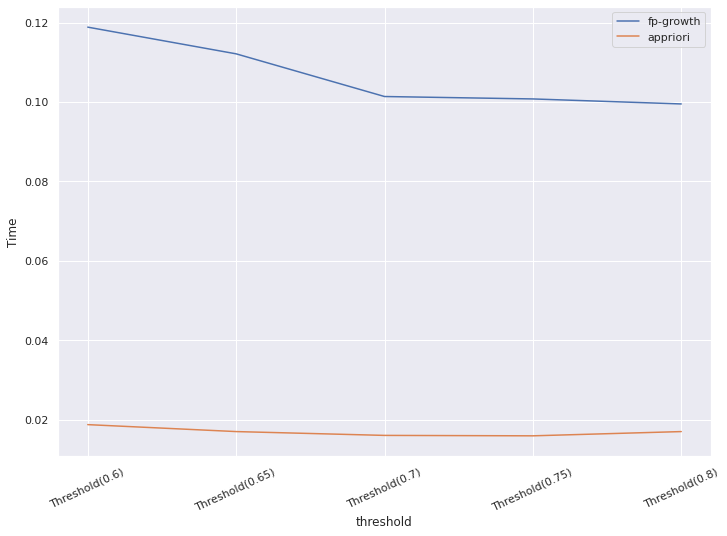

In [54]:
sns.lineplot(x = "threshold", y = "fp-growth", data = compare)
sns.lineplot(x = "threshold", y = "appriori", data = compare)
plt.legend(['fp-growth', 'appriori'], loc='best')
plt.ylabel("Time")
plt.xticks(rotation = 25)

plt.show()